In [1]:
pip install missingno

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [27]:
#import libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
#import missingno msno


In [28]:
#load and view data
filepath ="http://bit.ly/piopetro-data1"
df = pd.read_csv(filepath)
df

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND
0,07-Apr-14,15/9-F-1 C,0.0,0.000,0.000,0.000,0.000,0.00000,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
1,08-Apr-14,15/9-F-1 C,0.0,NaN,NaN,NaN,0.000,1.00306,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
2,09-Apr-14,15/9-F-1 C,0.0,NaN,NaN,NaN,0.000,0.97901,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
3,10-Apr-14,15/9-F-1 C,0.0,NaN,NaN,NaN,0.000,0.54576,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
4,11-Apr-14,15/9-F-1 C,0.0,310.376,96.876,277.278,0.000,1.21599,33.098,10.480,33.072,0.0,0.0,0.0,NaN,production
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15629,14-Sep-16,15/9-F-5,0.0,NaN,NaN,NaN,0.273,0.63609,0.078,0.229,0.019,0.0,0.0,0.0,NaN,production
15630,15-Sep-16,15/9-F-5,0.0,NaN,NaN,NaN,0.287,0.67079,0.085,0.229,0.006,0.0,0.0,0.0,NaN,production
15631,16-Sep-16,15/9-F-5,0.0,NaN,NaN,NaN,0.286,0.66439,0.085,0.229,0.012,0.0,0.0,0.0,NaN,production
15632,17-Sep-16,15/9-F-5,0.0,NaN,NaN,NaN,0.272,0.62466,0.075,0.228,0.026,0.0,0.0,0.0,NaN,production


In [32]:
#convert datetime column to pandas datetime format (%d-%b-%y)

df["DATEPRD"] = pd.to_datetime(df["DATEPRD"],format="%d-%b-%y")
df

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND
0,2014-04-07,15/9-F-1 C,0.0,0.000,0.000,0.000,0.000,0.00000,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
1,2014-04-08,15/9-F-1 C,0.0,NaN,NaN,NaN,0.000,1.00306,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
2,2014-04-09,15/9-F-1 C,0.0,NaN,NaN,NaN,0.000,0.97901,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
3,2014-04-10,15/9-F-1 C,0.0,NaN,NaN,NaN,0.000,0.54576,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
4,2014-04-11,15/9-F-1 C,0.0,310.376,96.876,277.278,0.000,1.21599,33.098,10.480,33.072,0.0,0.0,0.0,NaN,production
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15629,2016-09-14,15/9-F-5,0.0,NaN,NaN,NaN,0.273,0.63609,0.078,0.229,0.019,0.0,0.0,0.0,NaN,production
15630,2016-09-15,15/9-F-5,0.0,NaN,NaN,NaN,0.287,0.67079,0.085,0.229,0.006,0.0,0.0,0.0,NaN,production
15631,2016-09-16,15/9-F-5,0.0,NaN,NaN,NaN,0.286,0.66439,0.085,0.229,0.012,0.0,0.0,0.0,NaN,production
15632,2016-09-17,15/9-F-5,0.0,NaN,NaN,NaN,0.272,0.62466,0.075,0.228,0.026,0.0,0.0,0.0,NaN,production


In [34]:
# print all column names/ features

print(df.columns)

Index(['DATEPRD', 'NPD_WELL_BORE_NAME', 'ON_STREAM_HRS',
       'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL',
       'BORE_WI_VOL', 'FLOW_KIND'],
      dtype='object')


In [41]:
# print all well names(unique)

# df["NPD_WELL_BORE_NAME"]

print(df["NPD_WELL_BORE_NAME"].unique())

['15/9-F-1 C' '15/9-F-11' '15/9-F-12' '15/9-F-14' '15/9-F-15 D' '15/9-F-4'
 '15/9-F-5']


In [44]:
# Separate well 15/9-F-14 from dataframe

mask = df["NPD_WELL_BORE_NAME"]=="15/9-F-14"

well14_df = df[mask]

well14_df          
    

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND
4967,2008-02-12,15/9-F-14,0.0,0.0,0.0,0.000,0.000,NaN,0.000,0.0,0.059,0.0,0.0,0.0,NaN,production
4968,2008-02-13,15/9-F-14,0.0,0.0,0.0,0.000,0.000,NaN,0.000,0.0,0.068,0.0,0.0,0.0,NaN,production
4969,2008-02-14,15/9-F-14,0.0,0.0,0.0,0.000,0.000,NaN,0.000,0.0,0.050,0.0,0.0,0.0,NaN,production
4970,2008-02-15,15/9-F-14,0.0,0.0,0.0,0.000,0.000,NaN,0.000,0.0,0.066,0.0,0.0,0.0,NaN,production
4971,2008-02-16,15/9-F-14,0.0,0.0,0.0,0.000,0.000,NaN,0.000,0.0,0.105,0.0,0.0,0.0,NaN,production
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8018,2016-09-13,15/9-F-14,0.0,0.0,0.0,10.873,10.583,0.94937,10.873,0.0,8.894,0.0,0.0,0.0,NaN,production
8019,2016-09-14,15/9-F-14,0.0,0.0,0.0,10.877,10.583,1.11452,10.877,0.0,8.888,0.0,0.0,0.0,NaN,production
8020,2016-09-15,15/9-F-14,0.0,0.0,0.0,10.883,10.582,1.00047,10.883,0.0,8.856,0.0,0.0,0.0,NaN,production
8021,2016-09-16,15/9-F-14,0.0,0.0,0.0,10.879,10.583,1.16066,10.879,0.0,8.839,0.0,0.0,0.0,NaN,production


In [45]:
# Display summary statistics of data

well14_df.describe()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL
count,3056.000000,3050.000000,3050.000000,3050.000000,2533.000000,2860.000000,3056.000000,3056.000000,3056.000000,3056.000000,3056.000000,3056.000000,0.0
mean,20.541194,233.074651,95.133791,192.653088,10.527985,69.390287,41.530601,77.103033,15.435755,1290.009817,189139.247382,2330.245746,NaN
std,7.881136,64.923765,25.846814,57.736987,9.704603,31.064576,22.719575,25.615707,19.965158,1298.363790,184204.112292,1462.922870,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-59.000000,NaN
25%,24.000000,237.493000,99.621000,180.749500,0.000000,43.014158,31.020500,81.223500,2.665500,210.000000,31303.750000,695.500000,NaN
50%,24.000000,246.776000,101.007500,204.247500,12.969000,71.012955,33.546000,86.963500,7.177500,881.000000,142363.000000,2965.500000,NaN
75%,24.000000,261.971250,105.049000,229.632750,21.232000,100.000000,49.080250,88.539000,21.174000,2033.500000,305328.000000,3444.250000,NaN
max,25.000000,334.656000,106.773000,302.110000,26.682000,100.000000,125.719000,93.510000,125.719000,5644.000000,789975.000000,5692.000000,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

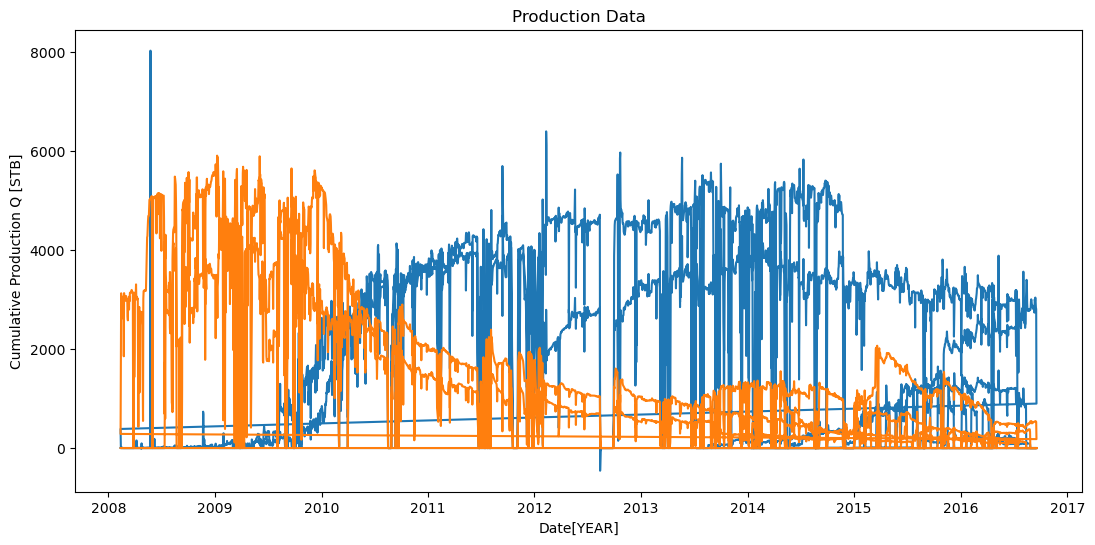

In [53]:
# plot water and oil production; BORE_WAT_VOL, BORE_OIL_VOL

plt.figure(figsize=(13,6))
plt.plot(df["DATEPRD"],df["BORE_WAT_VOL"])
plt.plot(df["DATEPRD"],df["BORE_OIL_VOL"])
plt.title("Production Data")
plt.xlabel("Date[YEAR]")
plt.ylabel("Cumulative Production Q [STB]")

plt.grid
plt.show

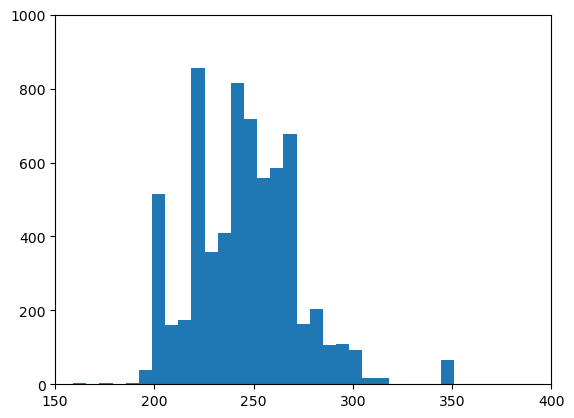

In [63]:
# produce histogram for data (using subplot!)
plt.hist(df["AVG_DOWNHOLE_PRESSURE"],bins=60)
plt.xlim(150,400)
plt.ylim(0,1000)
plt.show()

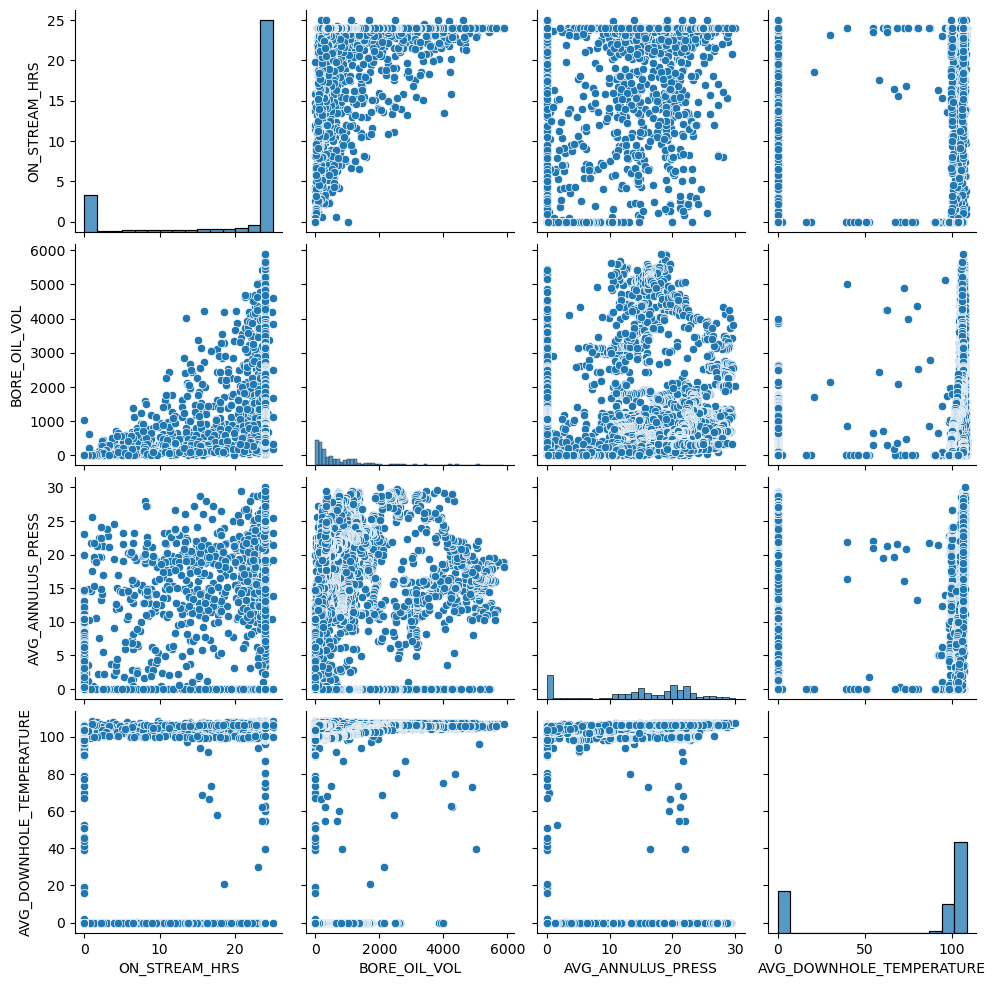

In [66]:
# make pairplot between features using seaborn; ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE.
# sns.pairplot

lists = ["ON_STREAM_HRS","BORE_OIL_VOL","AVG_ANNULUS_PRESS","AVG_DOWNHOLE_TEMPERATURE"]
input = df[lists]
#input
sns.pairplot(input)

In [ ]:
#visualize missing value (non-numeric) in data missingno